In [1]:
# Lab 0 

In [136]:
# 1

import numpy as np  #importing a library with some important functions to use such as importing data from excel data file

# Creating a function for the mean of an input list seperate from main program
def mean(list7):
    length=len(list7)                # defined a length of the input list to calculate mean
    i=0                             # a variable used to cycle through the data to add them together
    sum=0                           # Initialized ande defined a sum to be starting out as 0 before any calculations
    for i in range(0,length):     # easiest method to run through and add components in an array
        sum += list7[i]              # adds each component of input list starting from 0 since the first element of an array is 0 in Python
    return sum/length               # returns the mean calculations which can be printed outside the function when needed

# Testing our function outside
AVGtemp = np.loadtxt("weatherstats_vancouver_daily.csv", delimiter=",", usecols=(3), skiprows=(1))   # loaded data from excel file

MEAN= mean(AVGtemp)                                        # gave the imported data array as an input to the function and using 
                                                           # a different variable to store the mean outside of function (MEAN)
print("The average temperature is %.3f" % (MEAN))

# Confirming results using numpy.mean

test1= np.mean(AVGtemp)
print("The results using numpy.mean is %.3f" % (test1))   # formatted to output a sentence including a 3 decimal float of the mean
    

The average temperature is 10.590
The results using numpy.mean is 10.590


In [137]:
# 2

import math                                 # library containing important math functions such as square root

# creating the standard deviation function seperate from main program
def standard_deviation(list7):
    length=len(list7)                        # calculating mean to use for standard deviation formula
    i=0                             
    sum=0                           
    for i in range(0,length):     
        sum += list7[i]
    mean= sum/length
    difference = list7-mean                  # subtracting each value of the input array from its calculated mean
    squared=difference**2                   # squaring each component of the resultant array from previous line of code
    j=0                                     # used for loop to cycle through the array to add all values of array up
    sum1=0                                  # declared sum to start out as 0 before calculations
    for j in range(0,length):             # easiest way to use for loop to add each individual value of an array until end of array
        sum1 += squared[j]
    return math.sqrt(sum1/(length-1))            # returns calculated value of standard deviation

# used our function to calculate standard deviation from excel file data of average temperature
std=standard_deviation(AVGtemp)
print("The standard deviation of the average temperature is %.3f" % (std))

# compared our functions standard deviation calculated value to numpy.stnadard value
test2=np.std(AVGtemp)
print("The results using numpy.std is %.3f" % (test2))   # formatted to output a sentence including a 3 decimal float of the std

The standard deviation of the average temperature is 5.797
The results using numpy.std is 5.797


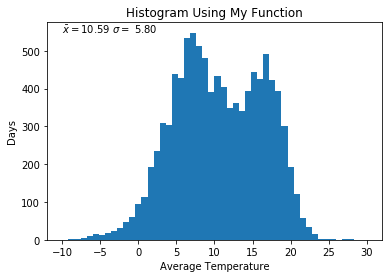

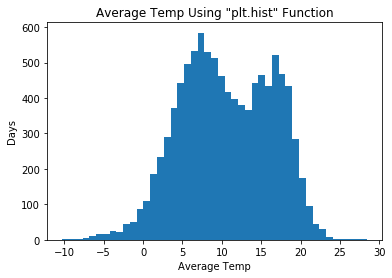

In [156]:
# 3

import matplotlib.pyplot as plt

# Creating a function that outputs histogram and the histogram data
# Takes input of a list of numbers, the min and max of that list, number of bins for the histogram and 
# a variable to choose wether to normalize the data, normalize by making last input 1

def histogram_data(list1, minimum, maximum, numberBins,normalize):
    
    # mean and standard deviation calculations for plot display    
    mean2=np.mean(list1)
    std2=np.std(list1)
    length=len(list1)
    
    # Each bin needs to have a start and end value on the xaxis so the bin width is calculated by the following:
    bin_width= (maximum-minimum)/numberBins
    
    # arrays to store output of bin height and bin number, since a bar graph would use a list of numbers only
    bin_height=[0]*numberBins
    bin_location=[0]*numberBins
    
    # This is a series of for loops that run each value from the input list to test which bin they fall into and assigns 
    # adds a count of 1 to the component of the bin height list that corresponds to the given bin number 
    j=0
    i=0
    for i in range(0,length):
        # print(i)
        for j in range(0,numberBins):
            if list1[i] >= minimum+bin_width*j and list1[i] < minimum+(j+1)*bin_width :
                # print(j)
                bin_height[j] +=1
                # print(bin_height)
    
    # This loop is just to output a bin location to plot the bin heights against, which increases linearly with the bin width
    k=0
    for k in range(0,numberBins):
        bin_location[k]=minimum+k*bin_width    
    
    # if the normalize conditions are met in input, then the plot will be plotted differently which is just scaling 
    # down of the bin height values by the total sum of the bin heights
    l=0
    sum=0
    bin_normalize=[0]*numberBins
    if normalize == 1:
        for l in range(0,numberBins):
            sum += bin_height[l]
        h=0
        for h in range(0,numberBins):
            bin_height[h]=bin_height[h]/sum
        plt.plot(bin_location,bin_height,color='red')
        plt.bar(bin_location,bin_height, width=0.5, align='edge', alpha=1.0)
        plt.text(minimum,max(bin_height), r'$\bar{x}=$%5.2f $\sigma=$%5.2f' % (mean2, std2))
        #plt.savefig("Histogram.eps", dpi=150)
        plt.show()
    # If normalize conditions not met in input then just plot the data as shown below, can save the outputs but I could not 
    # run another cell because of the eps file so commented it out
    else:
        
        plt.bar(bin_location,bin_height, width=bin_width, align='edge', alpha=1.0)
        plt.text(minimum,max(bin_height), r'$\bar{x}=$%5.2f $\sigma=$%5.2f' % (mean2, std2))
        #plt.savefig("Histogram.eps", dpi=150)
        plt.show()
                              
    return bin_height, bin_location

# testing out the above function with average temp data and the list below, works
a=[1,2,10,35,68,79,64,23,99,45,56,3,1,2]
plt.ylabel('Days')
plt.xlabel('Average Temperature')
plt.title('Histogram Using My Function')
plot=histogram_data(AVGtemp,-10,30,50,0)

# Plotting using the regular plt.hist function, can se the results are very similar
plt.hist(AVGtemp, bins='auto') # Quick histogram with settings on 'auto'
plt.xlabel('Average Temp')
plt.ylabel('Days')
plt.title('Average Temp Using "plt.hist" Function')
#plt.savefig("YVR_WS_Histo.pdf", dpi=150)
plt.show()



In [139]:
# created a function to check year if its leap year, to be used in Q4

def leapYear(year):
    if year%4 ==0:
        if year%100 ==0:
            if year%400 ==0:
                y=0
            else:
                y=1
        else:
            y=0
    else:
        y=1
    return y

                

In [155]:
# 4

from datetime import datetime # Library containing functions to convert string input of time to floats

# importing sunrise, sunset, and date data
sunrise=np.loadtxt("weatherstats_vancouver_daily.csv",dtype= str,delimiter=",", usecols=(45), skiprows=(1))
# print(sunrise)
sunset=np.loadtxt("weatherstats_vancouver_daily.csv",dtype= str,delimiter=",", usecols=(46), skiprows=(1))
# |print(sunset)
date=np.loadtxt("weatherstats_vancouver_daily.csv",dtype= str,delimiter=",", usecols=(0), skiprows=(1))
#print(date)

# Since data is only until the 3082 cell, the length of the above imported data cannot be used.
# Initializing arrays to store data of all the days temperatures after extracted using the datetime library functions
difference=[0]*3082
seconds=[0]*3082
date2=[0]*3082
year=[0]*3082
month=[0]*3082
day=[0]*3082
dayNumber=[0]*3082
dailyAvgTemp=[0]*366
i=0
# going through data extracting each element
for i in range(0,3082):
    difference[i] = datetime.strptime(sunset[i], "%H:%M:%S") - datetime.strptime(sunrise[i], "%H:%M:%S")
    seconds[i]=difference[i].total_seconds()
    date2[i]=datetime.strptime(date[i], "%Y-%m-%d")
    leapCheck=leapYear(date2[i].year)
    month[i]=date2[i].month
    day[i]=date2[i].day
    year[i]=date2[i].year
    
    # checking if the year extracted above is a leap year
    if leapCheck==1:
        k=28
    elif leapCheck==0:
        k=29

    # Stored the number of days in each month as an array to find the day number of the date in that given year
    # if it is a leap year the k value will be 29 and if not then 28 as declared above
    daysMonth=[31,k,31,30,31,30,31,31,30,31,30,31]
    
    # using the above dayMonth and the month extracted from the date, the day number is calculated below:
    # this gives the days up until the previous month
    j=0
    for j in range(0,month[i]-1):
        #print(daysMonth[j])
        dayNumber[i] += daysMonth[j]
    
    # and this adds the current day of the current month into the above dayNumber to give final day number in that year
    # subtracted one to make starting value of temperature array 0
    dayNumber[i] =dayNumber[i] + day[i]-1
    
    # this adds each average temperature into a 366 length array with each element corresponding to each day number
    # the dayNumber array has converted each date of the 3082 data points into a data point which made it easier to store the 
    # avg temp data into a new array depending directly on the dayNumber
    dailyAvgTemp[dayNumber[i]] += AVGtemp[i]
    
#print(dailyAvgTemp)
#print(day)
print(dayNumber)

# this was to be used to find the average of each day but was not able to exclude the leap year data and therefore this 
# question is incomplete due to the wrong averages of the day number temperatures
# If you have any feedback to where I could go from here, I would be interested!
dyear=[0]*100
dyear=set(year)
print(dyear)
duration=len(dyear)
print(duration)
k=0
for k in range(0,366):
    dailyAvgTemp[k]=dailyAvgTemp[k]/duration
#print(dailyAvgTemp)




[361, 360, 359, 358, 357, 356, 355, 354, 353, 352, 351, 350, 349, 348, 347, 346, 345, 344, 343, 342, 341, 340, 339, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283, 282, 281, 280, 279, 278, 277, 276, 275, 274, 273, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162,

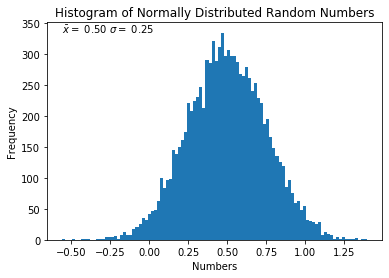

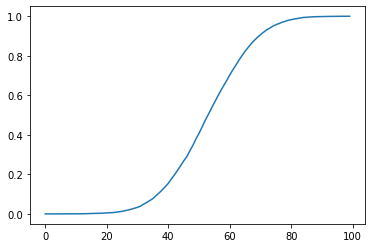

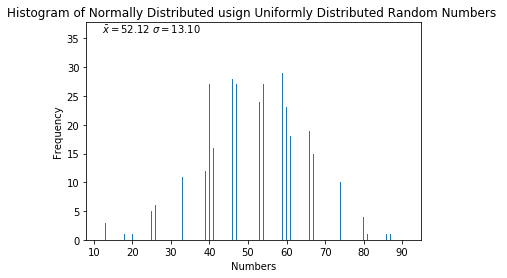

In [161]:
# 5


# a)

# generating random numbers normally distributed
N=10000
randNormal=np.random.normal(0.5,0.25, N)
#print(min(randNormal))


# b)

#Created a histogram of the above numbers
bins=100
inputLIST=randNormal
plt.ylabel('Frequency')
plt.xlabel('Numbers')
plt.title('Histogram of Normally Distributed Random Numbers')
plot=histogram_data(inputLIST,min(inputLIST),max(inputLIST),bins,0)
#print(plot[0])



# c)

# The following is a calculation of the c(k) function given in order to plot our CDF

# Calculates the constant denominator below which is sum of all bin heights
i=0
sumN=0
for i in range(0,bins):
    sumN +=plot[0][i]
#print(sumN)

# Then using two variables, stored the c(k) values in an array with the numerator of the function being added to each element
# in the inner for loop
cK=[0]*bins
k=0
l=0
h=0
for l in range(0,bins):
    h +=1
    #print(h)
    for k in range(0,h):
        cK[l] +=plot[0][k]/sumN
# generation evenly spaced values k to plot our c(k) vs. k        
xaxis = np.arange(len(cK))

plt.plot(xaxis,cK)
plt.show()

# d) e) f) g)

# Generating uniformly distributed values 
number=np.random.rand(1000)
leng=len(number)
#print(number)
#print(leng)

# comparing our random values with our c(k) values in chronilogical order of the c(k) array as this array goes from small to big 
# as we know values are being added more to the later values in the array. And the sequential value of c(k) should be 
# greater than our random value
normalList=[0]*leng
i=0
j=0
for j in range(0,leng):
    for i in range(0,bins):
        if cK[i]< number[j] and number[j] < cK[i+1]:
            normalList[j]=(i)

# Plotting the k value corresponders of of uniformly distributerd random numbers as a histogram to see if they are normally
# distributed, which they are as seen in the last graph
#print(normalList)
bins2=1000
inputList2=normalList
plt.ylabel('Frequency')
plt.xlabel('Numbers')
plt.title('Histogram of Normally Distributed usign Uniformly Distributed Random Numbers ')
plot2=histogram_data(inputList2,min(inputList2),max(inputList2),bins2,0)
        

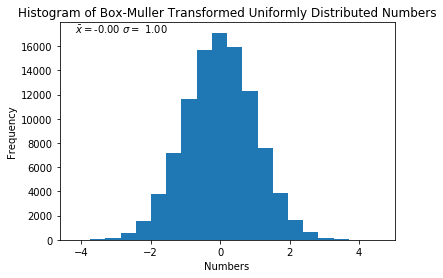

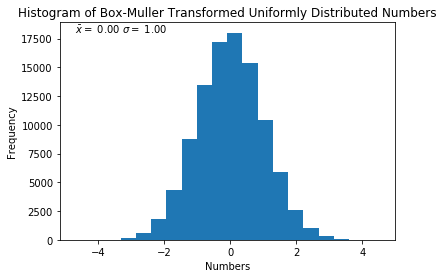

In [162]:
# 6

# a)

# Created box-Muller transform function as given using basic math operations

def box_muller(u1,u2):                                        
    z1=(np.sqrt(-2*np.log(u1)))*np.cos(2*math.pi*u2)          
    z2=(np.sqrt(-2*np.log(u1)))*np.sin(2*math.pi*u2)
    return z1, z2

# b)

# generate samples 
u1=np.random.rand(100000)
u2=np.random.rand(100000)
#print(u1)
#print(u2)
outputValue=box_muller(u1,u2)
#print(outputValue)


# Plotting the output of our function using the generated 1e5 samples, 
list8=outputValue[0]
bins3=20
plt.ylabel('Frequency')
plt.xlabel('Numbers')
plt.title('Histogram of Box-Muller Transformed Uniformly Distributed Numbers')
hist=histogram_data(list8,min(list8),max(list8),bins3,0)

list9=outputValue[1]
bins4=20
plt.ylabel('Frequency')
plt.xlabel('Numbers')
plt.title('Histogram of Box-Muller Transformed Uniformly Distributed Numbers')
hist=histogram_data(list9,min(list9),max(list9),bins4,0)